In [29]:
# Standard Library
import warnings

# Main Scientific Libraries
import numpy as np
import xarray as xr
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt

# Supplimental Libraries
import cfgrib

# Geographic/Meteorological Libraries
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import metpy.calc as mpcalc
import metpy.interpolate as mpinterp
from metpy.plots import Hodograph, SkewT, USCOUNTIES, USSTATES
from metpy.units import units

In [6]:
from lib.grib import *

In [2]:
filepath_template = "{base_dir}{grid_subdir}HRRR.t{init_hr:02d}z.bg{collection}{f_hr:02d}.tm{init_hr:02d}"
base_dir = "/home/jthielen/Downloads/ufs_sample/"
grid_subdir = "25km/"
init_hr = 0
collection = "dawp"
f_hr = 21

In [4]:
# Collect all homogeneous datasets within the heterogeneous grib file
datasets = cfgrib.open_datasets(filepath_template.format(
    base_dir=base_dir,
    grid_subdir=grid_subdir,
    init_hr=init_hr,
    collection=collection,
    f_hr=f_hr
))

In [5]:
# Build a report of all varibles in this collection
for i, ds in enumerate(datasets):
    print('Dataset {}\n'.format(i))
    print(ds.coords)
    print()
    for varname, var in ds.data_vars.items():
        print(varname + ' ' + str(var.dims))
        for attr in ('long_name', 'units', 'standard_name'):
            if attr in var.attrs:
                print('\t' + attr + ': ' + var.attrs[attr])
        print()
    print('----\n')

Dataset 0

Coordinates:
    time                   datetime64[ns] 2019-06-15
    step                   timedelta64[ns] 21:00:00
    adiabaticCondensation  int64 0
    latitude               (y, x) float64 25.12 25.17 25.22 ... 45.8 45.73 45.65
    longitude              (y, x) float64 239.3 239.5 239.7 ... 293.1 293.4
    valid_time             datetime64[ns] 2019-06-15T21:00:00

pres ('y', 'x')
	long_name: Pressure
	units: Pa

gh ('y', 'x')
	long_name: Geopotential Height
	units: gpm
	standard_name: geopotential_height

----

Dataset 1

Coordinates:
    time        datetime64[ns] 2019-06-15
    step        timedelta64[ns] 21:00:00
    cloudBase   int64 0
    latitude    (y, x) float64 25.12 25.17 25.22 25.28 ... 45.8 45.73 45.65
    longitude   (y, x) float64 239.3 239.5 239.7 240.0 ... 292.8 293.1 293.4
    valid_time  datetime64[ns] 2019-06-15T21:00:00

pres ('y', 'x')
	long_name: Pressure
	units: Pa

gh ('y', 'x')
	long_name: Geopotential Height
	units: gpm
	standard_name: geopote

In [18]:
ds = [ds for ds in search_dataset_all(datasets, coords=['isobaric.*']) if 'u' in ds.data_vars][0]
temp = metpy_parse_variable(ds['t'])
ds = ds.assign_coords(crs=temp['crs'], y=temp['y'], x=temp['x'])
ds

<xarray.Dataset>
Dimensions:        (isobaricInhPa: 45, x: 191, y: 97)
Coordinates:
    time           datetime64[ns] 2019-06-15
    step           timedelta64[ns] 21:00:00
  * isobaricInhPa  (isobaricInhPa) int64 1000 975 950 925 900 ... 20 10 7 5 2
    latitude       (y, x) float64 25.12 25.17 25.22 25.28 ... 45.8 45.73 45.65
    longitude      (y, x) float64 239.3 239.5 239.7 240.0 ... 292.8 293.1 293.4
    valid_time     datetime64[ns] 2019-06-15T21:00:00
    crs            object Projection: lambert_conformal_conic
  * y              (y) float64 -1.2e+06 -1.175e+06 ... 1.175e+06 1.2e+06
  * x              (x) float64 -2.375e+06 -2.35e+06 ... 2.35e+06 2.375e+06
Data variables:
    t              (isobaricInhPa, y, x) float32 ...
    u              (isobaricInhPa, y, x) float32 ...
    v              (isobaricInhPa, y, x) float32 ...
    q              (isobaricInhPa, y, x) float32 ...
    w              (isobaricInhPa, y, x) float32 ...
    gh             (isobaricInhPa, y, x) float32 ...
    r              (isobaricInhPa, y, x) float32 ...
    dpt            (isobaricInhPa, y, x) float32 ...
    clwmr          (isobaricInhPa, y, x) float32 ...
    icmr           (isobaricInhPa, y, x) float32 ...
    rwmr           (isobaricInhPa, y, x) float32 ...
    snmr           (isobaricInhPa, y, x) float32 ...
    rime           (isobaricInhPa, y, x) float32 ...
    tke            (isobaricInhPa, y, x) float32 ...
    wz             (isobaricInhPa, y, x) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP 
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP

In [20]:
lon = -99.97
lat = 37.77
x, y = ds['t'].metpy.cartopy_crs.transform_point(lon, lat, ccrs.PlateCarree())
profile = ds.interp(x=x, y=y, method='nearest')
profile

<xarray.Dataset>
Dimensions:        (isobaricInhPa: 45)
Coordinates:
    time           datetime64[ns] 2019-06-15
    step           timedelta64[ns] 21:00:00
  * isobaricInhPa  (isobaricInhPa) int64 1000 975 950 925 900 ... 20 10 7 5 2
    latitude       float64 37.8
    longitude      float64 259.9
    valid_time     datetime64[ns] 2019-06-15T21:00:00
    crs            object Projection: lambert_conformal_conic
    x              float64 -2.171e+05
    y              float64 -7.826e+04
Data variables:
    t              (isobaricInhPa) float32 308.6 307.1 305.6 ... 246.7 267.2
    u              (isobaricInhPa) float32 -2.69 -2.69 -2.69 ... -21.73 -30.21
    v              (isobaricInhPa) float32 -3.9 -3.9 -3.9 ... -1.38 -0.369 4.451
    q              (isobaricInhPa) float32 0.01092 0.01032 ... 4.223e-06
    w              (isobaricInhPa) float32 -0.0781 -0.0781 ... -6.6310546e-05
    gh             (isobaricInhPa) float32 20.334074 245.90294 ... 43104.23
    r              (isobaricInhPa) float32 30.0 30.0 30.0 ... 0.006 0.00042
    dpt            (isobaricInhPa) float32 288.528 287.26 ... 192.12479
    clwmr          (isobaricInhPa) float32 0.0 0.0 0.0 0.0 ... 1e-12 1e-12 1e-12
    icmr           (isobaricInhPa) float32 0.0 0.0 0.0 0.0 ... 1e-12 1e-12 1e-12
    rwmr           (isobaricInhPa) float32 0.0 0.0 0.0 0.0 ... 1e-12 1e-12 1e-12
    snmr           (isobaricInhPa) float32 0.0 0.0 0.0 ... 1.06e-11 1.39e-11
    rime           (isobaricInhPa) float32 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0
    tke            (isobaricInhPa) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    wz             (isobaricInhPa) float32 0.010969132 ... -0.007914305
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP 
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP

In [26]:
# Prepare variables for plotting
p = profile['t'].metpy.vertical.metpy.unit_array.to('hPa')
T = profile['t'].metpy.unit_array.to('degC')
Td = mpcalc.dewpoint_from_specific_humidity(p, T, profile['q'])
u = profile['u'].metpy.unit_array.to('knots')
v = profile['v'].metpy.unit_array.to('knots')

/home/jthielen/miniconda3/envs/ufs/lib/python3.7/site-packages/metpy/xarray.py:282: UserWarning: More than one time coordinate present for variable "t".
  + varname + '.')
/home/jthielen/miniconda3/envs/ufs/lib/python3.7/site-packages/pint/numpy_func.py:295: RuntimeWarning: invalid value encountered in log
  result_magnitude = func(*stripped_args, **stripped_kwargs)


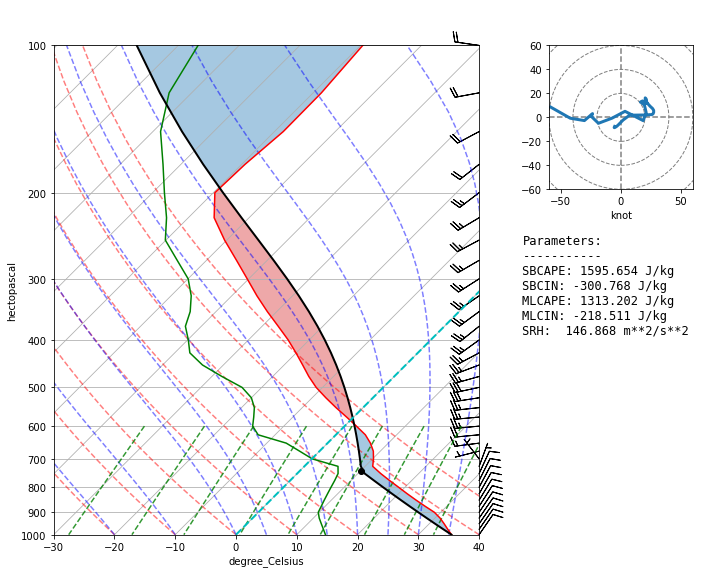

In [65]:
# Create a new figure. The dimensions here give a good aspect ratio
fig = plt.figure(figsize=(12, 9))

# Grid for plots
gs = gridspec.GridSpec(3, 3)
skew = SkewT(fig, rotation=45, subplot=gs[:, :2])

# Plot the data using normal plotting functions, in this case using
# log scaling in Y, as dictated by the typical meteorological plot
skew.plot(p, T, 'r')
skew.plot(p, Td, 'g')
skew.plot_barbs(p, u, v)
skew.ax.set_ylim(1000, 100)

# Add LCL, parcel profile and CAPE/CIN
lcl_pressure, lcl_temperature = mpcalc.lcl(p[0], T[0], Td[0])
skew.plot(lcl_pressure, lcl_temperature, 'ko', markerfacecolor='black')
prof = mpcalc.parcel_profile(p, T[0], Td[0]).to('degC')
skew.plot(p, prof, 'k', linewidth=2)
skew.shade_cin(p, T, prof)
skew.shade_cape(p, T, prof)

# An example of a slanted line at constant T -- in this case the 0
# isotherm
skew.ax.axvline(0, color='c', linestyle='--', linewidth=2)

# Add the relevant special lines
skew.plot_dry_adiabats()
skew.plot_moist_adiabats()
skew.plot_mixing_lines()

# Good bounds for aspect ratio
skew.ax.set_xlim(-30, 40)

# Create a hodograph
ax = fig.add_subplot(gs[0, -1])
h = Hodograph(ax, component_range=60.)
h.add_grid(increment=20)
h.plot(u, v)
ax.set_ylabel(None)

# Text of params
sbcape, sbcin = mpcalc.cape_cin(p, T, Td, prof)
mlcape, mlcin = mpcalc.mixed_layer_cape_cin(p, T, Td)
(storm_u, storm_v), _, _ = mpcalc.bunkers_storm_motion(p, u, v, profile['gh'])
_, _, srh = mpcalc.storm_relative_helicity(profile['gh'], u, v, depth=6 * units.km, storm_u=storm_u, storm_v=storm_v)
txt = "Parameters:\n-----------\n"
row = "{var}: {val:8.3f} {unit}\n"
txt += row.format(
    var="SBCAPE",
    val=sbcape.m_as('J/kg'),
    unit='J/kg'
)
txt += row.format(
    var="SBCIN",
    val=sbcin.m_as('J/kg'),
    unit='J/kg'
)
txt += row.format(
    var="MLCAPE",
    val=mlcape.m_as('J/kg'),
    unit='J/kg'
)
txt += row.format(
    var="MLCIN",
    val=mlcin.m_as('J/kg'),
    unit='J/kg'
)
txt += row.format(
    var="SRH",
    val=srh.m_as('m**2/s**2'),
    unit='m**2/s**2'
)
tax = fig.add_subplot(gs[1:, -1])
tax.text(0, 0.95, txt, fontsize=12, fontfamily='monospace', verticalalignment='top')
tax.axis('off')

# Show the plot
plt.show()